In [35]:
import pandas as pd
import matplotlib.pyplot as plt


In [36]:
# Берем 'TR3_DSBD_MARGIN_TRANS.csv' 
df = pd.read_csv('TRANSIT2_REMONT_ORDERS.csv', delimiter=';', encoding='KOI8-R')

df.head()

,ID_REMONT_ORDER,ORDER_NUMBER,ID_CONT,EXPECTED_DATE_REPAIR,ACTUAL_DATE_REPAIR,CAR_NUMBER,WORKS_PRICE,SPARE_PARTS,TOTAL_AMOUNT,IS_CLOSED
0,D3BF929897D7F6D1E053024A14ACFFDB,3160,55E535CB2D204324ABAF2E69D826F577,27.12.2021 15:00:00,NaN,NaN,NaN,NaN,NaN,0
1,D6F8941128DEF36FE053024A14AC3307,3195,433E098AB4104294A2A9511360E815EC,05.02.2022 15:00:00,07.02.2022,с956ен797,"2800,000000","7962,000000","10762,000000",1
2,DACEF7BF92732CAFE053024A14AC147D,3261,AF8A1EFB5E454C2D9770A86C6AF13CA3,24.03.2022 12:00:00,24.03.2022,н051нм199,"1000,000000","0,000000","1000,000000",1
3,DAF9FC01051F5CCEE053024A14ACD6C9,3266,AF8A1EFB5E454C2D9770A86C6AF13CA3,29.03.2022 10:00:00,29.03.2022,н051нм199,"8820,000000","5051,160000","13871,160000",1
4,DB58D36CCED3BD76E053024A14ACC9E2,3282,EB9CB5E874E140FBA4B731713B188A8D,30.03.2022 11:00:00,NaN,NaN,NaN,NaN,NaN,1


In [37]:
# Убедимся, что столбец TOTAL_AMOUNT имеет строковый формат
df['TOTAL_AMOUNT'] = df['TOTAL_AMOUNT'].astype(str)

# Заменяем запятые на точки и преобразуем в float
df['TOTAL_AMOUNT'] = df['TOTAL_AMOUNT'].str.replace(',', '.').astype(float)

# Фильтрация данных
filtered_df = df[
    (df['CAR_NUMBER'].str.contains('[А-Яа-я0-9]')) &
    (df['TOTAL_AMOUNT'] > 0) &
    ~((df['CAR_NUMBER'].str.contains('0000')) | (df['CAR_NUMBER'].str.contains('-')))
]

# Группировка и вычисление агрегатных значений
grouped_df = filtered_df.groupby('ID_CONT').agg(
    {
        'CAR_NUMBER': 'count',
        'TOTAL_AMOUNT': 'sum'
    }
).reset_index()

# Вывод результатов
print(grouped_df)



                              ID_CONT  CAR_NUMBER  TOTAL_AMOUNT
0    00AB29ED9B60371BE053034A14AC1C40           2      20599.20
1    00DC36AD69AC4E0D995121E88F3592E4          10     195538.80
2    0133CFEE11540803E053034A14AC3CC1           1      37842.00
3    01564272B6434F3BB05A96CAFAA2F201           1       6000.00
4    0161AA96A92F46BBBBA65C06B1F4745A           1       1518.00
..                                ...         ...           ...
631  FEC388B6332C4C8DA975284738A17184          32     416798.76
632  FF0219E11FB34C87B9043D902E49A5F4           1      25497.60
633  FFE06FB5045E4F22B4AF556EDF11E204           4      25113.60
634  FFE5B914112B4C429FD8D7622AECB746           1      54558.00
635  FFF936D83C004C72B6854E654345FEB7           1       2400.00

[636 rows x 3 columns]


In [38]:
# Преобразование данных в числовой формат
grouped_df['CAR_NUMBER'] = pd.to_numeric(grouped_df['CAR_NUMBER'], errors='coerce')
grouped_df['TOTAL_AMOUNT'] = pd.to_numeric(grouped_df['TOTAL_AMOUNT'], errors='coerce')

# Вычисление колонки TOTAL_AMOUNT_PER_CAR
grouped_df['TOTAL_AMOUNT_PER_CAR'] = grouped_df['TOTAL_AMOUNT'] / grouped_df['CAR_NUMBER']


In [39]:
print(grouped_df)

                              ID_CONT  CAR_NUMBER  TOTAL_AMOUNT  \
0    00AB29ED9B60371BE053034A14AC1C40           2      20599.20   
1    00DC36AD69AC4E0D995121E88F3592E4          10     195538.80   
2    0133CFEE11540803E053034A14AC3CC1           1      37842.00   
3    01564272B6434F3BB05A96CAFAA2F201           1       6000.00   
4    0161AA96A92F46BBBBA65C06B1F4745A           1       1518.00   
..                                ...         ...           ...   
631  FEC388B6332C4C8DA975284738A17184          32     416798.76   
632  FF0219E11FB34C87B9043D902E49A5F4           1      25497.60   
633  FFE06FB5045E4F22B4AF556EDF11E204           4      25113.60   
634  FFE5B914112B4C429FD8D7622AECB746           1      54558.00   
635  FFF936D83C004C72B6854E654345FEB7           1       2400.00   

     TOTAL_AMOUNT_PER_CAR  
0             10299.60000  
1             19553.88000  
2             37842.00000  
3              6000.00000  
4              1518.00000  
..                    ...  

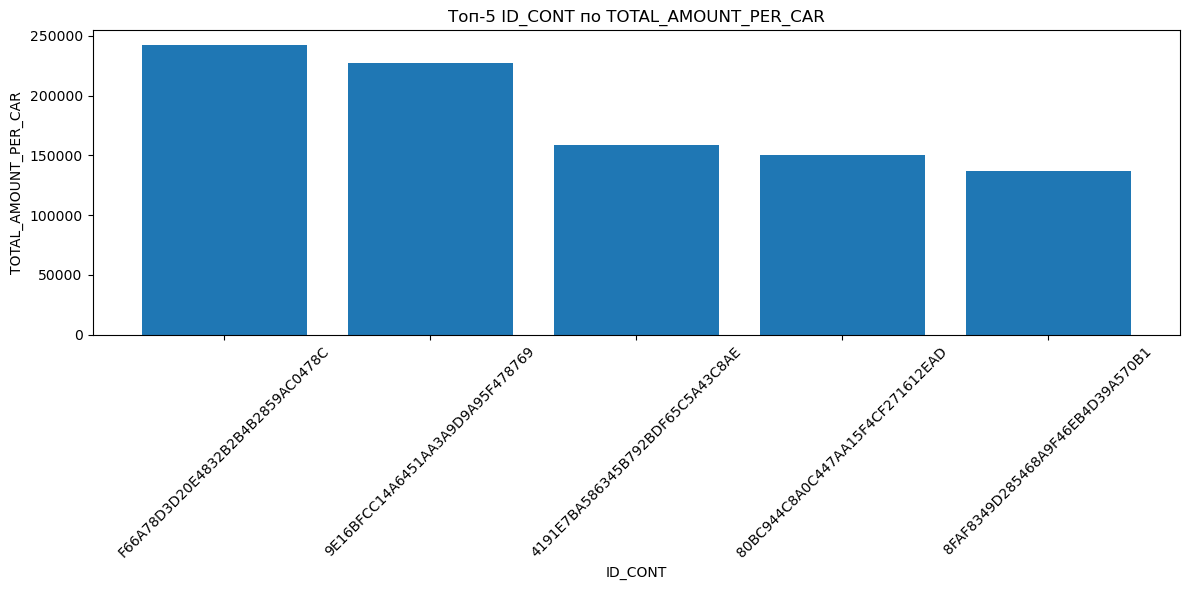

In [44]:

# Сортировка данных по убыванию значения TOTAL_AMOUNT_PER_CAR и выбор топ-5
top_5_data = grouped_df.sort_values(by='TOTAL_AMOUNT_PER_CAR', ascending=False).head(5)

# Построение столбчатой диаграммы
plt.figure(figsize=(12, 6))
plt.bar(top_5_data['ID_CONT'], top_5_data['TOTAL_AMOUNT_PER_CAR'])
plt.xlabel('ID_CONT')
plt.ylabel('TOTAL_AMOUNT_PER_CAR')
plt.title('Топ-5 ID_CONT по TOTAL_AMOUNT_PER_CAR')
plt.xticks(rotation=45)  # Поворот меток по оси X для лучшей читаемости
plt.tight_layout()
plt.show()
